## EXERCICE 12 : PLS parcimonieuse (sparse-PLS)

Nous allons maintenant creuser l'algorithme de la PLS vu précédement avec des donnees qui contiennent des relations plus complexes. Nous allons aussi essayer de detecter automatiquement les variables les plus pertinentes a l'aide d'une strategie L1 de parcimonie.


In [1]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale

#Generation de donnees
n = 1000
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
X[:, 2]=0.5*X[:, 1]+0.1*np.random.normal(size=n)
X[:, 3]=0.4*X[:, 1]+0.1*np.random.normal(size=n)
y = 1.5 * X[:, 0] + 1 * X[:, 1]  + np.random.normal(size=n)





In [2]:

def PLS1(X,y,l):
    """
    PLS1 strategy - NIPALS algorithm

    Returns:
        - B: regression coefficients wrt the original predictors
        - W: orthonormal weights
        - P: matrix of X-loading
        - q: vector of y-loading
    """
    [n,p]=X.shape

    list_w_k=[]
    list_p_k=[]
    list_q_k=[]

    X_k=X.copy()
    v_k=np.dot(X_k.transpose(),y)
    w_k=v_k/np.linalg.norm(v_k)   #covariance of each variable with y

    for k in range(l):
        #compute the projections and loadings
        tau_k=np.dot(X_k,w_k)   #weighted sum of the variables with weights that emphasize the variables of X that are the most correlated with y
        t_k=tau_k/np.linalg.norm(tau_k)
        p_k=np.dot(X_k.transpose(),t_k)   #projector: weighted sum of the observations with weights that emphasize the observations whose values participate most to the covariance with y in average
        q_k=np.dot(t_k.transpose(),y) #captured variability in y

        #save the elements for the matrices
        list_w_k.append(w_k)
        list_p_k.append(p_k)
        list_q_k.append(q_k)

        #prepare the next iteration
        if k<l-1:
            X_k=X_k-np.dot(t_k.reshape(-1,1),p_k.reshape(1,-1))  #enleve l'information capturee par la projection de X_k sur t_k
            v_k=np.dot(X_k.transpose(),y)    #covariance de chaque variable (apres avoir enleve la projection des donnees sur les precedents t_k) avec y
            w_k=v_k/np.linalg.norm(v_k)

    #create the martices
    W=np.zeros([p,l])
    P=np.zeros([p,l])
    q=np.zeros(l)
    for i in range(l):
        W[:,i]=list_w_k[i]
        P[:,i]=list_p_k[i]
        q[i]=list_q_k[i]

    tmp=np.linalg.inv(np.dot(P.transpose(),W))
    B=np.dot(np.dot(W,tmp),q)

    return [B,W,P,q]



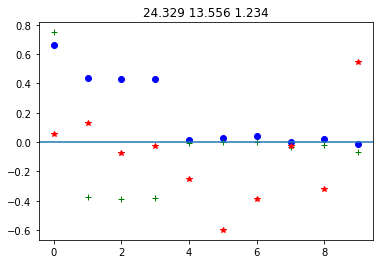

In [3]:

#Data normalization
X=scale(X)
y=scale(y)

[B,W,P,q]=PLS1(X,y,3)

plt.plot(W[:,0],'bo')
plt.plot(W[:,1],'g+')
plt.plot(W[:,2],'r*')
plt.axline((0.,0.),(9.,0.))
plt.title(str(np.round(q[0],3))+' '+str(np.round(q[1],3))+' '+str(np.round(q[2],3)))
plt.show()



#### <span style="color:blue">QUESTION 1</span> 
    
Bien comprendre le detail de l'algorithme NIPALS qui est dans la fonction PLS1

Que representent les courbes du plot et les valeurs de q ?

#### <span style="color:blue">REPONSE 1 </span> 

    



Les courbes du plot représentent l'importance de chaque variable dans les pondérations de la régression. Ainsi le premier poids est basé sur les 4 premières variables. Le second surtout sur la première. etc

Les valeurs de q renseignent sur la variabilité capturée dans y qui provient essentiellement des deux premières directions de projection.

#### <span style="color:blue">QUESTION 2</span> 
    
Dans les lignes ci-dessous, quel est le lien entre X, T et X_reco ?

    

In [4]:
T=np.dot(X,W)
X_reco=np.dot(T,W.transpose())

for i in range(3):
    print("obs "+str(i)+":")
    print(X[i,:])
    print(X_reco[i,:])


obs 0:
[ 1.8914302   0.39998622  0.3468145   0.73790588  0.09984981 -1.17356103
  2.01216961 -0.78447562 -0.89249675 -0.91259747]
[ 1.97205625  0.46335655  0.4753776   0.46680905  0.06599255  0.17028426
  0.14786748 -0.01954564  0.08414427 -0.19722077]
obs 1:
[-0.96550357  0.55959882  0.6251542   0.83022904  0.50119316  0.99338397
  1.17968346 -0.82393439  0.45906846  1.25101307]
[-1.00351533  0.62726036  0.78456102  0.74378536  0.17733255  0.40616155
  0.27336582  0.06659396  0.25365619 -0.26128405]
obs 2:
[ 0.48069119  1.06158256  1.14522748  0.89436008 -0.4660904   1.71734747
  1.10903476  0.80183382  1.31948754  0.14843125]
[ 0.42426819  0.89008638  1.23137434  1.14076884  0.43684738  1.03124716
  0.70788809  0.07268435  0.58284811 -0.86083785]


#### <span style="color:blue">REPONSE 2 </span> 

    


X correspond aux observations. T à la projection des observations ("phase de compression/réduction de dimension"). X_reco à la reprojection des résultats ("phase de décompression/augmentation de dimension")

#### <span style="color:blue">Question 3</span> 

Que fait on dans les lignes ci-dessous ?

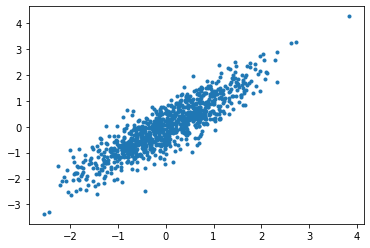

In [5]:
Y_pred=np.dot(X,np.vstack(B))
plt.plot(Y_pred,y,'.')
plt.show()



#### <span style="color:blue">REPONSE 3 </span> 

...

### <span style="color:blue">Question 4 </span> 

En vous inspirant du cours, modifiez la fonction PLS1 de maniere a avoir une base de projecteurs parcimonieuse. Utilisez la pour trouver une base plus simple a expliquer que precedement.

### <span style="color:blue">Réponse 4 </span> 


/tmp/ipykernel_2175779/1616760408.py:41: RuntimeWarning: invalid value encountered in true_divide
  w_k = w_k/np.linalg.norm(w_k)


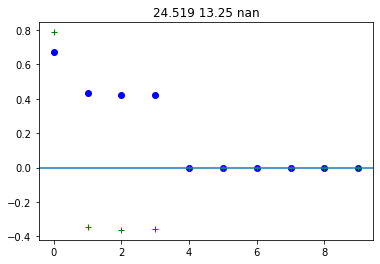

0.6005568758263831
0.09647456216183362
nan


In [11]:

def sPLS1(X,y,l,lambda_val):
    """
    sparse PLS1 strategy - NIPALS algorithm

    Returns:
        - B: regression coefficients wrt the original predictors
        - W: orthonormal weights
        - P: matrix of X-loading
        - q: vector of y-loading
    """
    [n,p]=X.shape

    list_w_k=[]
    list_p_k=[]
    list_q_k=[]

    X_k=X.copy()
    v_k=np.dot(X_k.transpose(),y)
    w_k=v_k - lambda_val*np.sign(v_k)
    w_k[np.sign(v_k)!=np.sign(w_k)] = 0.
    w_k = w_k/np.linalg.norm(w_k)

    for k in range(l):
        #compute the projections and loadings
        tau_k=np.dot(X_k,w_k)   #weighted sum of the variables with weights that emphasize the variables of X that are the most correlated with y
        t_k=tau_k/np.linalg.norm(tau_k)
        p_k=np.dot(X_k.transpose(),t_k)   #projector: weighted sum of the observations with weights that emphasize the observations whose values participate most to the covariance with y in average
        q_k=np.dot(t_k.transpose(),y) #captured variability in y

        #save the elements for the matrices
        list_w_k.append(w_k)
        list_p_k.append(p_k)
        list_q_k.append(q_k)

        #prepare the next iteration
        if k<l-1:
            X_k=X_k-np.dot(t_k.reshape(-1,1),p_k.reshape(1,-1))  #enleve l'information capturee par la projection de X_k sur t_k
            v_k=np.dot(X_k.transpose(),y)    #covariance de chaque variable (apres avoir enleve la projection des donnees sur les precedents t_k) avec y
            w_k=v_k - lambda_val*np.sign(v_k)
            w_k[np.sign(v_k)!=np.sign(w_k)] = 0.
            w_k = w_k/np.linalg.norm(w_k)

    #create the martices
    W=np.zeros([p,l])
    P=np.zeros([p,l])
    q=np.zeros(l)
    for i in range(l):
        W[:,i]=list_w_k[i]
        P[:,i]=list_p_k[i]
        q[i]=list_q_k[i]

    tmp=np.linalg.inv(np.dot(P.transpose(),W))
    B=np.dot(np.dot(W,tmp),q)

    return [B,W,P,q]



[B,W,P,q]=sPLS1(X,y,3,50.)


plt.plot(W[:,0],'bo')
plt.plot(W[:,1],'g+')
plt.plot(W[:,2],'r*')
plt.axline((0.,0.),(9.,0.))
plt.title(str(np.round(q[0],3))+' '+str(np.round(q[1],3))+' '+str(np.round(q[2],3)))
plt.show()


T_sparse=np.dot(X,W)
X_reco_sparse=np.dot(T_sparse,W.transpose())

print(np.abs(X[:,0:4]).std())
print(np.abs(X[:,0:4]-X_reco[:,0:4]).std())
print(np.abs(X[:,0:4]-X_reco_sparse[:,0:4]).std())




On retrouve les 2 premières directions principales : seules les 4 premières variables semblent pertinentes.